# KNN Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv("bikeshare.csv")

In [4]:
df.head()

season  yr  mnth  hr  holiday  weekday  notbizday  weathersit      temp  \
0       1   0     1   0        0        6          1           1 -1.334609   
1       1   0     1   1        0        6          1           1 -1.438475   
2       1   0     1   2        0        6          1           1 -1.438475   
3       1   0     1   3        0        6          1           1 -1.334609   
4       1   0     1   4        0        6          1           1 -1.334609   

        hum  windspeed      dteday  cnt  
0  0.947345  -1.553844  2011-01-01   16  
1  0.895513  -1.553844  2011-01-01   40  
2  0.895513  -1.553844  2011-01-01   32  
3  0.636351  -1.553844  2011-01-01   13  
4  0.636351  -1.553844  2011-01-01    1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  dteday      17379 non-null  object 
 12  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


In [6]:
categorical = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday', 'weathersit']
for col in categorical:
    df[col]=df[col].astype("category")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   notbizday   17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   hum         17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  dteday      17379 non-null  object  
 12  cnt         17379 non-null  int64   
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 817.0+ KB


## 1. Drop the dteday variable and then define your feature space and the target variable. Split the data into test (20%) and train set (80%)

In [8]:
df.drop('dteday', axis=1, inplace=True)

In [9]:
df.head()

season yr mnth hr holiday weekday notbizday weathersit      temp       hum  \
0      1  0    1  0       0       6         1          1 -1.334609  0.947345   
1      1  0    1  1       0       6         1          1 -1.438475  0.895513   
2      1  0    1  2       0       6         1          1 -1.438475  0.895513   
3      1  0    1  3       0       6         1          1 -1.334609  0.636351   
4      1  0    1  4       0       6         1          1 -1.334609  0.636351   

   windspeed  cnt  
0  -1.553844   16  
1  -1.553844   40  
2  -1.553844   32  
3  -1.553844   13  
4  -1.553844    1

In [10]:
df = pd.get_dummies(df, drop_first=True)

In [11]:
df.head()

temp       hum  windspeed  cnt  season_2  season_3  season_4  yr_1  \
0 -1.334609  0.947345  -1.553844   16         0         0         0     0   
1 -1.438475  0.895513  -1.553844   40         0         0         0     0   
2 -1.438475  0.895513  -1.553844   32         0         0         0     0   
3 -1.334609  0.636351  -1.553844   13         0         0         0     0   
4 -1.334609  0.636351  -1.553844    1         0         0         0     0   

   mnth_2  mnth_3  ...  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  \
0       0       0  ...          0          0          0          0          0   
1       0       0  ...          0          0          0          0          0   
2       0       0  ...          0          0          0          0          0   
3       0       0  ...          0          0          0          0          0   
4       0       0  ...          0          0          0          0          0   

   weekday_6  notbizday_1  weathersit_2  weathersit_3  weathersit_4  
0          1            1             0             0             0  
1          1            1             0             0             0  
2          1            1             0             0             0  
3          1            1             0             0             0  
4          1            1             0             0             0  

[5 rows x 53 columns]

In [12]:
y = df['cnt']
X = df.drop('cnt', axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

## 2. From sklearn.neighbors import the relevant function for KNN regression.

### 1. Train all the model with the default features.

In [14]:
from sklearn.neighbors import KNeighborsRegressor

In [15]:
KNN_regression = KNeighborsRegressor()
KNN_regression.fit(X_train, y_train)

KNeighborsRegressor()

### 2. Make predictions on the test set and save them as y_hat

In [16]:
# Predicting the Test set results
y_hat = KNN_regression.predict(X_test)

### 3. Construct a data frame named df_predictions with 2 columns. y_test, and y_hat  from previous part

In [17]:
df_predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
df_predictions.head()

y_test  y_hat
4495       26   47.0
4418       47   90.4
7141       11   25.2
14765     205  184.8
16541      65   68.0

### 4. Visualize actual vs predicted counts in the test set using an scatterplot. Are you visually satisfied with the regression model? 

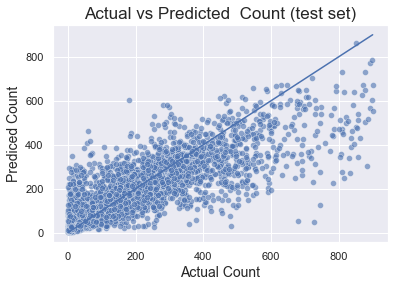

In [18]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual Count', fontsize=14)
plt.ylabel('Prediced Count', fontsize=14)
plt.title('Actual vs Predicted  Count (test set)', fontsize=17)
plt.show()

I am relatively satisfied with this visualization. However, the scatterplott shows us that as 'actual count' gets to be higher (above about 600), the predictions aren't as accurate. 

### 5. Report the RMSE_test for the KNN regression model. 

In [19]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
MSE_test

11795.53

In [20]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

108.61

The RMSE_test for the KNN regression model is **108.61**. 

## 3. Cross validation:

### 1. Estimate the RMSE_test by doing a 5 fold cross validation on the train set and name it as RMSE_CV.

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
NMSE = cross_val_score(estimator = KNN_regression, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

In [23]:
MSE_CV = round(np.mean(-NMSE),4)
MSE_CV

12078.5291

In [24]:
RMSE_CV = round(np.sqrt(MSE_CV), 4)
RMSE_CV

109.9024

### 2. Plot the RMSE_CV vs K and find the optimal value for K in the KNN regression model.

In [25]:
RMSE_CV=[]
RMSE_test = []

k=15

for i in range(1,k):
    KNN_i = KNeighborsRegressor(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    RMSE_i = np.sqrt(np.mean(-1*cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 10 , scoring="neg_mean_squared_error" )))
    RMSE_CV.append(RMSE_i)
    
    RMSE_test.append(np.sqrt(np.mean(np.square(y_test - KNN_i.predict(X_test)))))
    
optimal_k = pd.DataFrame({'RMSE_CV': np.round(RMSE_CV,2), 'RMSE_test':np.round(RMSE_test,2), 'K':range(1,k)})

In [26]:
optimal_k.head(10)

RMSE_CV  RMSE_test   K
0   125.56     120.17   1
1   111.82     109.26   2
2   108.22     108.80   3
3   106.77     108.21   4
4   107.36     108.61   5
5   107.60     109.36   6
6   108.08     109.73   7
7   108.34     110.25   8
8   108.39     110.65   9
9   108.57     110.58  10

In [27]:
np.argmin(optimal_k['RMSE_CV'])

3

In [28]:
opt_k = optimal_k.loc[np.argmin(optimal_k['RMSE_CV']), 'K']
opt_k

4

**The optimal value for k is 4!**

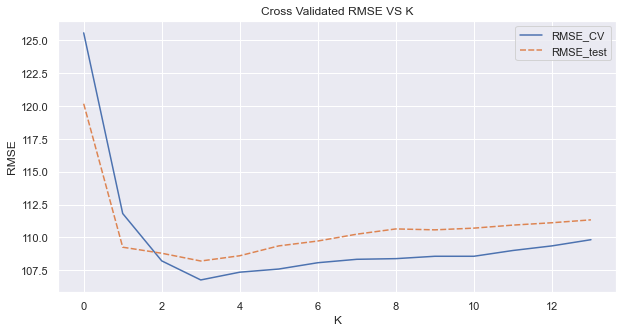

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k.drop('K', axis=1))
plt.title('Cross Validated RMSE VS K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

## 4. Report the R-squared in the test set with the optimal k for KNN. Compare this number with R-squared in the test set using multiple regression model. Which model is performing better in the test set? 

#### KNN with optimal k

In [30]:
KNN_regression = KNeighborsRegressor(n_neighbors = opt_k)
KNN_regression.fit(X_test, y_test)

KNeighborsRegressor(n_neighbors=4)

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat)

0.6558145421357219

#### Multiple Regression

In [32]:
import statsmodels.api as sm 

X_train_wc = sm.add_constant(X_train)
X_test_wc = sm.add_constant(X_test)

In [33]:
sm.OLS(y_test, X_test).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     156.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:31:47   Log-Likelihood:                -20990.
No. Observations:                3476   AIC:                         4.208e+04
Df Residuals:                    3424   BIC:                         4.240e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
temp            40.3252      4.105      9.822      0.000      32.276      48.375
hum            -14.7914      2.404     -6.152      0.000     -19.505     -10.078
windspeed       -1.3452      1.924     -0.699      0.484      -5.117       2.427
season_2        35.9084     10.739      3.344      0.001      14.853      56.963
season_3        34.7548     13.002      2.673      0.008       9.263      60.247
season_4        71.7850     11.104      6.465      0.000      50.014      93.556
yr_1            85.0945      3.519     24.178      0.000      78.194      91.995
mnth_2           8.6401      9.034      0.956      0.339      -9.073      26.353
mnth_3          19.7616      9.765      2.024      0.043       0.616      38.907
mnth_4          16.3931     14.652      1.119      0.263     -12.335      45.121
mnth_5          35.7545     15.717      2.275      0.023       4.938      66.571
mnth_6          22.4899     16.092      1.398      0.162      -9.062      54.042
mnth_7          10.2197     18.130      0.564      0.573     -25.328      45.767
mnth_8          11.3010     17.697      0.639      0.523     -23.397      45.999
mnth_9          29.2601     15.697      1.864      0.062      -1.517      60.037
mnth_10         37.0080     14.429      2.565      0.010       8.718      65.299
mnth_11          1.3284     14.104      0.094      0.925     -26.325      28.982
mnth_12         -3.8431     11.274     -0.341      0.733     -25.947      18.261
hr_1           -12.6162     12.047     -1.047      0.295     -36.236      11.004
hr_2           -19.9897     12.123     -1.649      0.099     -43.758       3.779
hr_3           -41.1354     12.143     -3.387      0.001     -64.944     -17.326
hr_4           -44.5798     12.102     -3.684      0.000     -68.307     -20.852
hr_5           -30.6293     11.983     -2.556      0.011     -54.125      -7.134
hr_6            38.4007     12.231      3.140      0.002      14.420      62.382
hr_7           184.7978     12.078     15.300      0.000     161.117     208.479
hr_8           277.2199     12.165     22.788      0.000     253.368     301.072
hr_9           169.2628     12.555     13.482      0.000     144.647     193.879
hr_10          116.4020     12.300      9.464      0.000      92.287     140.517
hr_11          130.5947     12.307     10.612      0.000     106.465     154.724
hr_12          168.7284     12.614     13.376      0.000     143.996     193.461
hr_13          164.7255     12.473     13.207      0.000     140.270     189.181
hr_14          162.5089     12.369     13.139      0.000     138.258     186.760
hr_15          165.2119     12.443     13.278      0.000     140.816     189.608
hr_16          242.6892     12.648     19.188      0.000     217.891     267.487
hr_17          402.5835     12.682     31.744      0.000     377.718     427.449
hr_18

**R-Squared:**

KNN regression – 0.6558. 

simple regression model – 0.700. 

==> This means that the **simple regression model** is preforming better in the test set. 

# KNN Classification

## 1. Define a binary target variable overload. Overload=1 if cnt>500 and 0 otherwise. What are the proportions of overload vs non-overload in your data set? Is the target variable balanced or imbalanced? 

In [34]:
df['overload']= np.where(df['cnt']>500, 1, 0)

In [35]:
df.drop('cnt', axis=1, inplace=True)

In [36]:
df.head()

temp       hum  windspeed  season_2  season_3  season_4  yr_1  mnth_2  \
0 -1.334609  0.947345  -1.553844         0         0         0     0       0   
1 -1.438475  0.895513  -1.553844         0         0         0     0       0   
2 -1.438475  0.895513  -1.553844         0         0         0     0       0   
3 -1.334609  0.636351  -1.553844         0         0         0     0       0   
4 -1.334609  0.636351  -1.553844         0         0         0     0       0   

   mnth_3  mnth_4  ...  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  \
0       0       0  ...          0          0          0          0          1   
1       0       0  ...          0          0          0          0          1   
2       0       0  ...          0          0          0          0          1   
3       0       0  ...          0          0          0          0          1   
4       0       0  ...          0          0          0          0          1   

   notbizday_1  weathersit_2  weathersit_3  weathersit_4  overload  
0            1             0             0             0         0  
1            1             0             0             0         0  
2            1             0             0             0         0  
3            1             0             0             0         0  
4            1             0             0             0         0  

[5 rows x 53 columns]

In [37]:
pd.crosstab(df['overload'],df['overload'], normalize='all')*100

overload          0         1
overload                     
0         92.640543  0.000000
1          0.000000  7.359457

92.6% of the dataset is classified as non-overload, and 7.4% of the dataset is classified as overload. This means that the target variable overload is **imbalanced**!

## 2. Along with the target variable, define your feature space (X) and split the data into test (30%) and train set (70%)

In [38]:
y = df['overload']
X = df.drop('overload', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

## 3. From sklearn.neighbors import the relevant function for KNN classification.

In [39]:
from sklearn.neighbors import KNeighborsClassifier

### 1. Train the KNN classification model using its default parameters.

In [40]:
# Fitting KNN classifier to the Training set

KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

### 2. Generate the predicted probabilities and predicted classifications and save them as y_hat_probs, y_hat respectively.

In [41]:
# Predicting the Test set probabilities and classes
y_hat      = KNN_classifier.predict(X_test)
y_hat_probs = KNN_classifier.predict_proba(X_test)[:,1] 

### 3. Plot the histogram of y_hat_probs.

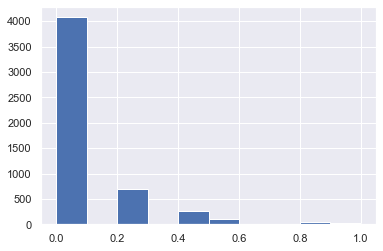

In [42]:
plt.hist(y_hat_probs)
plt.show()

The histogram is mainly concentrated to the left at 0.0. This shows us that the data set is pretty unbalanced. Below a threshold of 0.6 the model will almost always predict negative. 

### 4. Generate predicted classifications for two different thresholds (30% and 70% threshold). Save these new predictions as y_hat_30 and y_hat_70. Which threshold should you use if your goal is to avoid too many false negatives? Explain your answer.

In [43]:
y_hat_30 = np.where(y_hat_probs>0.3,1,0)
y_hat_70 = np.where(y_hat_probs>0.7,1,0)

If we want to avoid false negatives we should use the threshold 30%. 

### 5. Construct a data frame named df_predictions with 5 columns. y_test,  and the 4 y_hats from previous parts

In [44]:
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat, 'y_hat_probs':y_hat_probs,
                               'y_hat_30':y_hat_30, 'y_hat_70':y_hat_70})
df_predictions.tail()

y_test  y_hat  y_hat_probs  y_hat_30  y_hat_70
2447        0      0          0.0         0         0
10818       0      0          0.4         1         0
3131        0      0          0.0         0         0
3890        0      0          0.0         0         0
10858       0      0          0.2         0         0

## 4. Borrow my_KNN_report() function from the python notebook of class 13. 

In [45]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



def my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5, weights='uniform'):
    knn= KNeighborsClassifier(n_neighbors=K, weights=weights)
    knn.fit(X_train, y_train)
    probs = knn.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")
    return cm_labled
 

### 1. Report the Accuracy, precision, recall and f1 score along with the confusion matrix for threshold =0.5. Interpret all these statistics. Do you trust the accuracy of the model? why?

In [47]:
my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5, weights='uniform')

-----------------------------------------
Accuracy  = 0.945
Error_rate  = 0.055
Precision = 0.82
Recall    = 0.35
f1_score  = 0.49
-----------------------------------------


Predict : negative  Predict :positive 
Actual : negative                 4788                  31
Actual : positive                  256                 139

##### **Accuracy:** 94.5% of the predictions were correct. </br>
**Error Rate:** 5.5% of the predictions were incorrect. </br>
**Precision:** Precision is 0.82 because 82% of the predictions that there was an overload were, were accurately predicted.  (139/(139+31)=0.82) </br>
**Recall:** Recall is 0.35 because 35% of the cases that are in fact classified as an overload, were accurately predicted (139/(139+256) = 0.35). </br>
**F1 Score:** The f1 score is a combination of precision and recall. In this case the harmonic combination of the two measures is 0.49. </br>
</br>
I do not trust the accuracy of the model. By looking at the confusion matrix we can see that the data set is imbalanced, so accuracy won't be a reliable measure of performance. 

### 2. Now use threshold = 0.3 in the my_logistic_report() function. what happens to accuracy, precision, recall and f1 score? what happens to false negatives? is this consistent with you answer to question 3.4? 

In [48]:
my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.3, weights='uniform')

-----------------------------------------
Accuracy  = 0.9334
Error_rate  = 0.0666
Precision = 0.56
Recall    = 0.61
f1_score  = 0.58
-----------------------------------------


Predict : negative  Predict :positive 
Actual : negative                 4626                 193
Actual : positive                  154                 241

**Accuracy** decreases slightly, **error rate** increases slightly. **Precision** decreases and **recall** increases. **F-score** increases. </br>
This is consistent with the answer to 3.4. By choosing a lower threshold the performance of the model increased, because we are avoiding more false negatives. 

## 5. Plot the ROC curve and report the AUC score. Is your model doing a better job than random prediction (no skill)? 

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.886


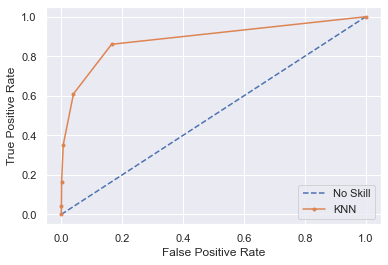

In [49]:
# generate a no skill (ns) prediction and KNN  (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = KNN_classifier.predict_proba(X_test)[:,1]
# calculating scores for no skill and KNN 
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Yes! KNN is doing a better job than random prediction, because the AUC is bigger than 0.5. 

## 6. Cross validation: 

In [50]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

### 1. Estimate the error_rate_test by doing a 5 fold cross validation on the train set and name it as error_rate_CV.

In [51]:
# remember we saved our model in an object called "KNN_classifier"
accuracy = cross_val_score(estimator = KNN_classifier, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

In [52]:
1-accuracy

array([0.05754213, 0.05466502, 0.05713111, 0.05466502, 0.05713111])

In [53]:
error_rate=round((1-accuracy).mean(),4)
error_rate

0.0562

### 2. Plot the error_rate_CV vs K and find the optimal value for K in the KNN classification model. 

In [54]:
error_rate = []
k=15

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    error_rate.append(np.mean(y_test != KNN_i.predict(X_test)) )


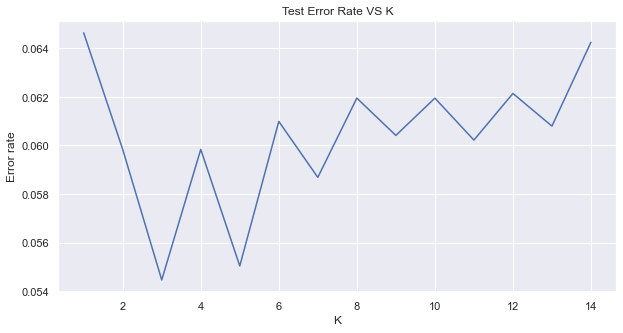

In [55]:
plt.figure(figsize=(10,5))
sns.lineplot(y=error_rate, x=range(1,k))
plt.title('Test Error Rate VS K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [56]:
error_rate_test = []
error_rate_CV=[]
k=15

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    accuracy =  cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 5 , scoring="accuracy")
    error_rate_CV.append(np.mean(1-accuracy))
    error_rate_test.append(np.mean(y_test != KNN_i.predict(X_test)) )
    
optimal_k = pd.DataFrame({'error_rate_CV': error_rate_CV, 'error_rate_test':error_rate_test}, index=range(1,k))

In [57]:
optimal_k.head(10)

error_rate_CV  error_rate_test
1        0.064201         0.064634
2        0.059104         0.059839
3        0.058529         0.054469
4        0.059515         0.059839
5        0.056227         0.055044
6        0.059844         0.060990
7        0.055651         0.058688
8        0.060008         0.061949
9        0.057049         0.060414
10       0.060995         0.061949

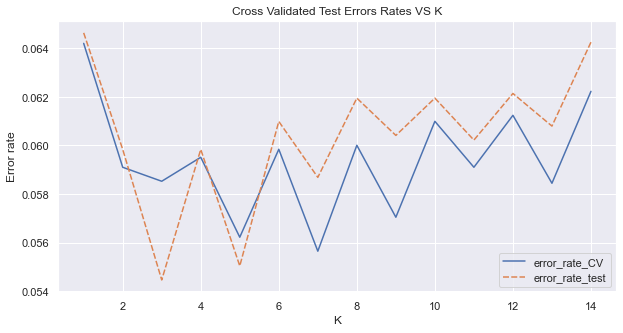

In [58]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k)
plt.title('Cross Validated Test Errors Rates VS K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

This graph shows us that the **optimal k is 5**!

## 7. As the manager of Capital Bikeshare, you are dealing with a trade off between unexpected overload cost and cost of idle bikes. If the cost of a single idle bike is smaller than the cost of a single unexpected overload, then which of the following probability thresholds would satisfy your objective? 0.3, 0.5 or 0.7? 

Because an unexpected overload (false negative) is more costly, I would choose 0.3 as the threshold. By reducing the threshold we avoid more false negatives. 